In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [170]:
data=pd.read_csv("train.csv")
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [171]:
# Coverting the training image data and image label in array
X = np.array(data)[:, 1:]
Y = np.array(data)[:, 0]
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

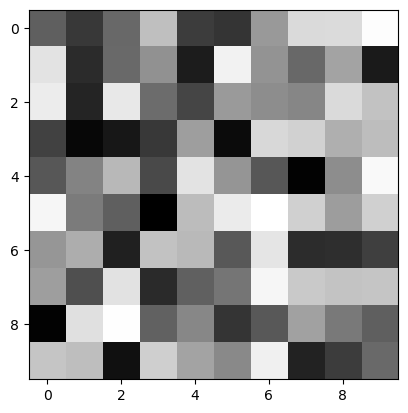

In [172]:
# Plotting images
a = np.random.random((10,10))
plt.figure()
plt.imshow(a, cmap='gray')
plt.show()

In [173]:
df = data.values[:5000]
df.shape

(5000, 785)

In [174]:
X, y = df[:,1:], df[:, 0]

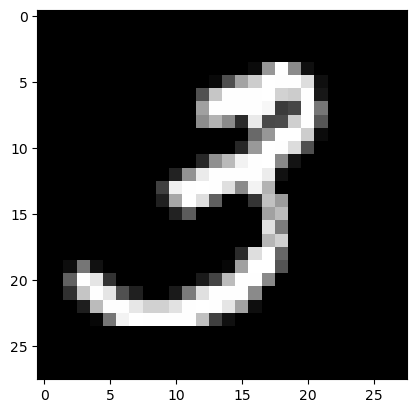

In [175]:
# Plotting digit
im = X[4487].reshape((28,28))
plt.figure()
plt.imshow(im, cmap='gray')
plt.show()

In [176]:
split = int(X.shape[0] * 0.80)
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

In [177]:
start = time.process_time()
def knn(X_train, y_train, test_point, k):
    
    distances = [] # Contains list of tuples (distance, label)
    
    for data_point, label in zip(X_train, y_train):
        distances.append((euclidean(test_point, data_point), label))
    #     for i in range(X_train.shape[0]):
    #         data_point = X_train[i]
    #         label = y_train[i]
    
    sorted_distances = sorted(distances, key=lambda x: x[0])
    k_nearest_neighbors = np.array(sorted_distances[:k])
    freq = np.unique(k_nearest_neighbors[:,1], return_counts=True)
    labels, counts = freq
    majority_vote = labels[counts.argmax()]
    return majority_vote

In [178]:
def euclidean(p1, p2):
    return np.sqrt(np.sum((p1-p2)**2))

euclidean(np.array([1,2,3]), np.array([4,5,6]))

5.196152422706632

In [179]:
def prediction(X_test, y_test, X_train, y_train, k):
    predictions = []
   
    
    for test_point in X_test:
        pred_label = knn(X_train, y_train, test_point, k)
        predictions.append(pred_label)
    
    predictions = np.array(predictions)
   
    return predictions
end = time.process_time()
print("Time elapsed for the algorithm:", end - start)

Time elapsed for the algorithm: 0.02969400000006317


In [162]:
e=prediction(X_test, y_test, X_train, y_train, k=5)

In [163]:
result=pd.DataFrame(e)
result

,0
0,8.0
1,8.0
2,0.0
3,5.0
4,0.0
...,...
995,2.0
996,5.0
997,5.0
998,7.0


In [164]:
#Get the accuracy when k value is 5. 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(result, y_test)*100
print ('Accuracy of the classifier is', accuracy, '%')

Accuracy of the classifier is 92.80000000000001 %


In [165]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(result, y_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 91   0   2   0   0   1   1   0   1   0]
 [  0 110   2   0   2   0   0   6   4   1]
 [  0   0 106   1   0   0   0   0   0   1]
 [  1   1   1 106   0   4   0   0   2   0]
 [  0   0   1   0  82   0   1   0   0   2]
 [  0   0   0   0   0  80   1   0   5   0]
 [  2   0   0   0   0   3 100   0   2   0]
 [  0   1   1   0   0   0   0  87   1   5]
 [  0   0   0   1   0   0   0   0  78   0]
 [  0   0   2   2   4   2   0   4   1  88]]

True Positives(TP) =  91

True Negatives(TN) =  110

False Positives(FP) =  0

False Negatives(FN) =  0


In [166]:
score = []
for k in range (5,15):
    y_pred=prediction(X_test, y_test, X_train, y_train, k)
    accuracy = accuracy_score(y_pred, y_test)
    score.append(accuracy)
    print(accuracy)

0.928
0.929
0.926
0.931
0.931
0.925
0.923
0.923
0.922
0.913


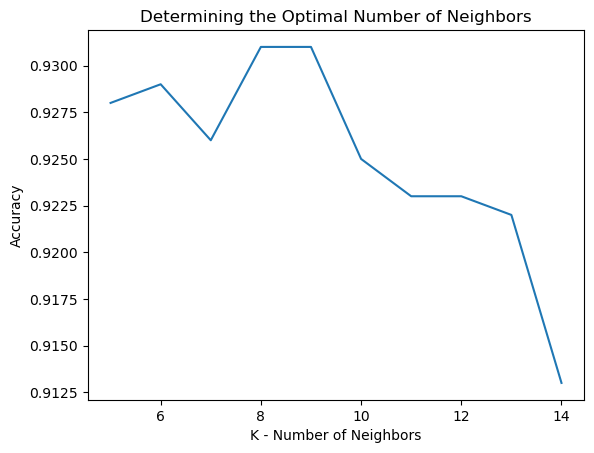

In [167]:
plt.plot(range(5,15), score)
plt.title('Determining the Optimal Number of Neighbors')
plt.xlabel('K - Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [51]:
data_test = pd.read_csv("test.csv")

In [52]:
data_test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
df_test = data_test.values
images_test = df_test[:20]
images_test.shape

(20, 784)

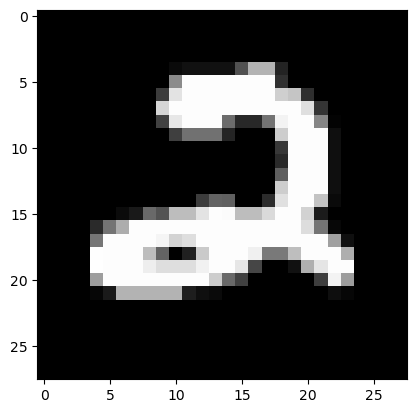

Label: 2.0


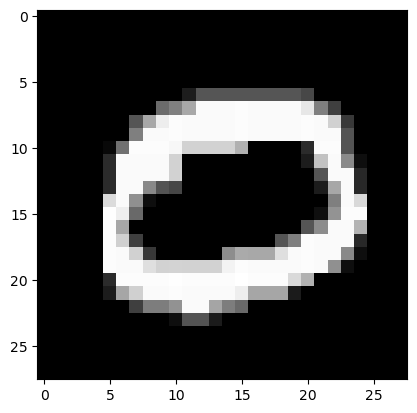

Label: 0.0


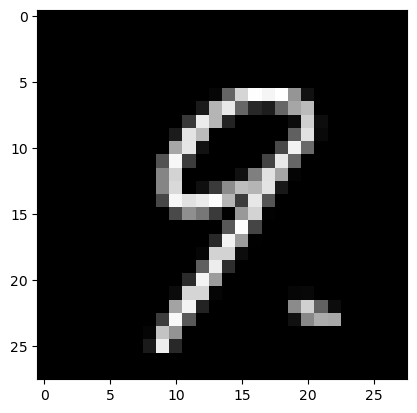

Label: 9.0


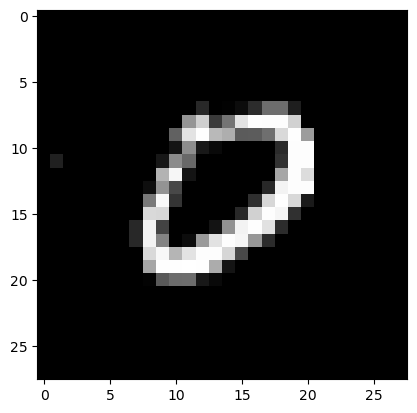

Label: 9.0


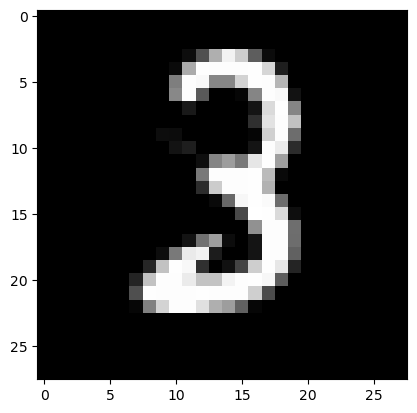

Label: 3.0


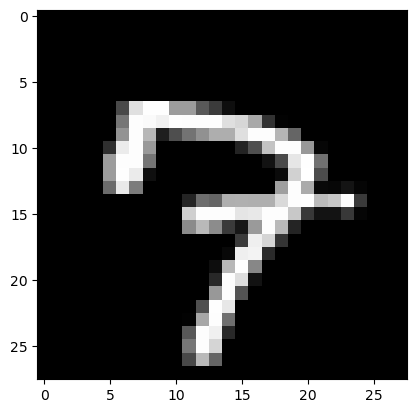

Label: 7.0


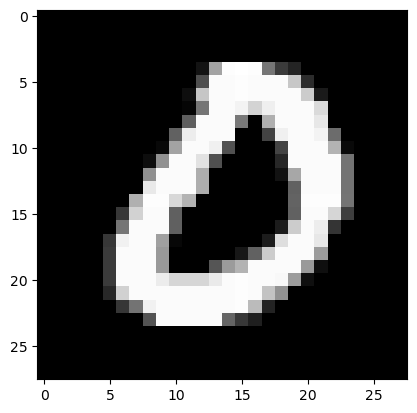

Label: 0.0


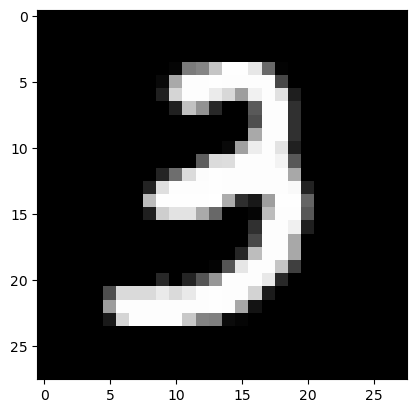

Label: 3.0


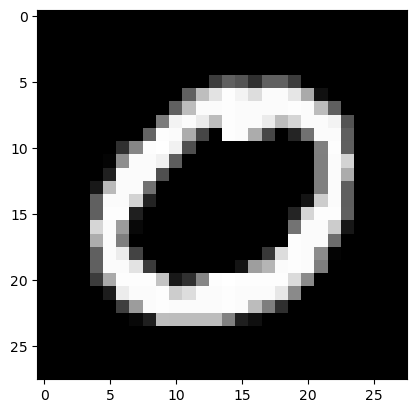

Label: 0.0


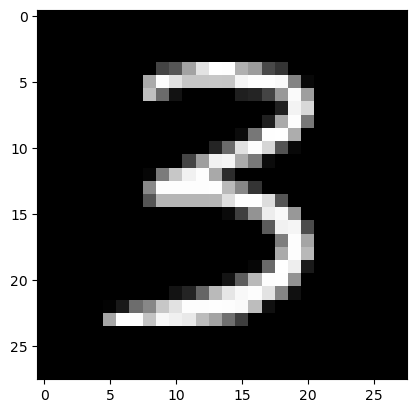

Label: 3.0


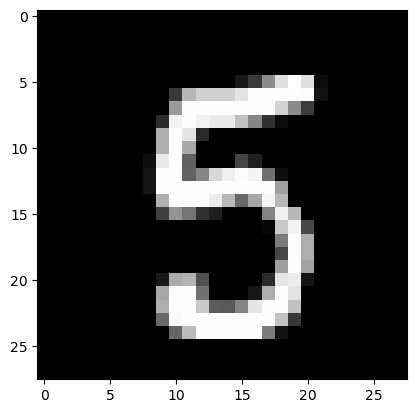

Label: 5.0


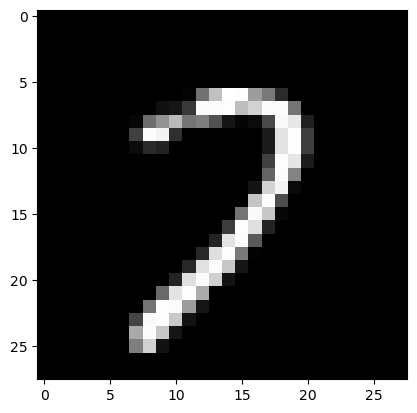

Label: 7.0


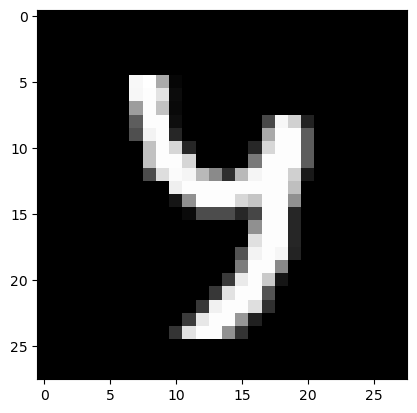

Label: 4.0


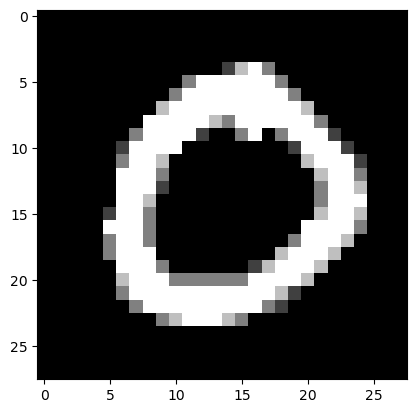

Label: 0.0


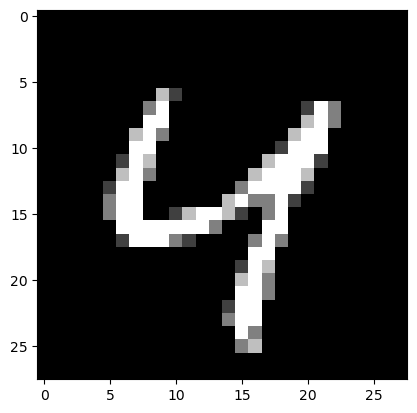

Label: 4.0


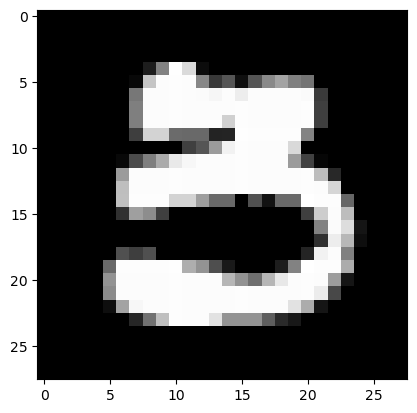

Label: 3.0


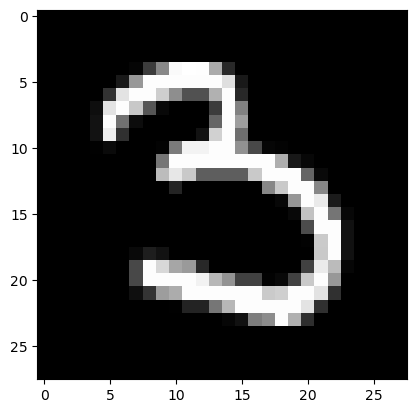

Label: 3.0


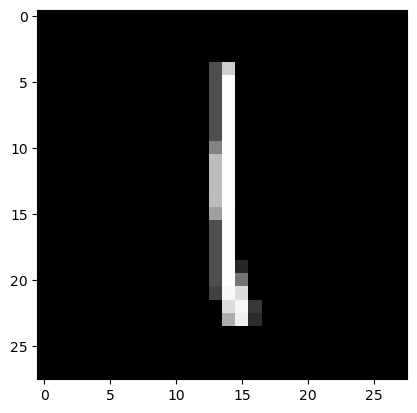

Label: 1.0


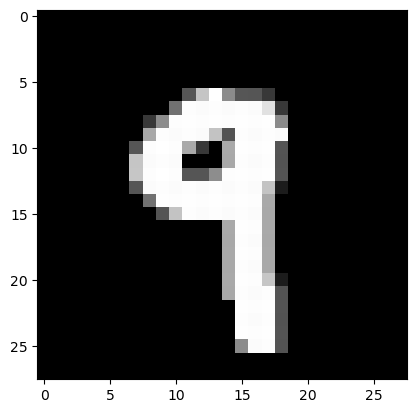

Label: 9.0


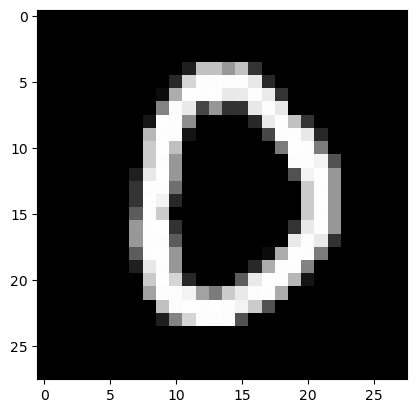

Label: 0.0


In [59]:
for test in images_test:
    im = test.reshape((28,28))
    plt.figure()
    plt.imshow(im, cmap='gray')
    plt.show()
    print("Label:", knn(X_train, y_train, test))
   